## 2、理解 k-means 算法的流程并。

数据集：testSet.txt（上传到群文件和圈子了）

+ 引入一些必要的包。

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [10]:
class KMeans:

    def __init__(self, n_clusters=3, random_state=666, max_iter=300):
        # 样本点矩阵，即 X
        self.samples = None
        # 样本的特征个数
        self.n_features = None
        # 设置聚类中心的个数
        self.n_clusters = n_clusters
        # 聚类中心
        self.cluster_centers_ = None
        # 最多迭代多少次
        self.max_iter = max_iter

        # 每个数据的类标
        self.labels_ = None

        # 设置随机数种子，多次运行得到同样的结果
        # 初始化聚类中心的时候要随机从样本点中选择聚类中心
        np.random.seed(random_state)

    def fit(self, X):
        # 做一些简单的检查
        if X.shape[0] == 0:
            raise Exception('不能对空数据进行聚类')

        if X.shape[0] < self.n_clusters:
            raise Exception('提供的数据比聚类中心的个数还少，无法聚类')

        self.samples = X
        self.n_features = X.shape[1]

        # 先得到初始化的聚类中心
        self.__init_cluster_centers()
        print('初始化的聚类中心：', self.cluster_centers_)

        # 下面这个列表保存了每个数据的聚类中心
        labels = np.array([0] * len(X))
        # 迭代次数
        n_loop = 0

        while True:

            # 保存了上一次迭代的聚类结果
            old_labels = labels.copy()

            # 对于每一个样本，计算它和聚类中心的距离，
            # 并且选择最近的作为当前的聚类中心
            for index, sample in enumerate(self.samples):
                # 选择最近的，就是距离最小的
                labels[index] = np.argmin(
                    [np.linalg.norm(sample - cluster_center) for cluster_center in self.cluster_centers_])

            # 如果聚类中心没有发生变化，聚类停止
            # data.all() ：当 data 中的数据全部为 True 的时候，才返回 True
            if (old_labels == labels).all():
                print('迭代到第 {} 次，聚类中心没有发生变化，这时聚类是稳定的，聚类结束。'.format(n_loop))
                break

            # 下面根据每个样本的类标，重新计算聚类中心
            for i in range(self.n_clusters):
                # axis=0 表示针对每一列求平均，即针对每一个特征求平均
                # 得到的就是新的质心
                self.cluster_centers_[i] = np.mean(
                    self.samples[labels == i], axis=0)

            n_loop += 1
            # 如果迭代次数已经足够多，就不继续迭代了
            if n_loop == self.max_iter:
                break

        self.labels_ = labels

    def __init_cluster_centers(self):
        """
        初始化聚类中心，从所有的样本中，随机选择 k 个样本作为聚类中心
        """
        self.cluster_centers_ = np.empty((self.n_clusters, self.n_features))
        # 数据的个数
        l = len(self.samples)

        # 这里随机选择样本点作为聚类中心，其实这些聚类中心可以不是样本点
        # 只要各个特征满足在特征的最小值和最大值之间，都可以成为初始的聚类中心
        indexes = np.random.permutation(l)
        for index, item in enumerate(self.samples[indexes[:self.n_clusters]]):
            self.cluster_centers_[index] = item.copy()

In [6]:
# 加载数据
data = np.loadtxt('testSet.txt', delimiter='\t')
print(data.shape)
# 一共 80 个数据，每个数据 2 个特征

(80, 2)


看一下数据的分布，感觉聚类个数设置为 4 比较合理。

/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/matplotlib/font_manager.py:1238: UserWarning: findfont: Font family ['STHeiti'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


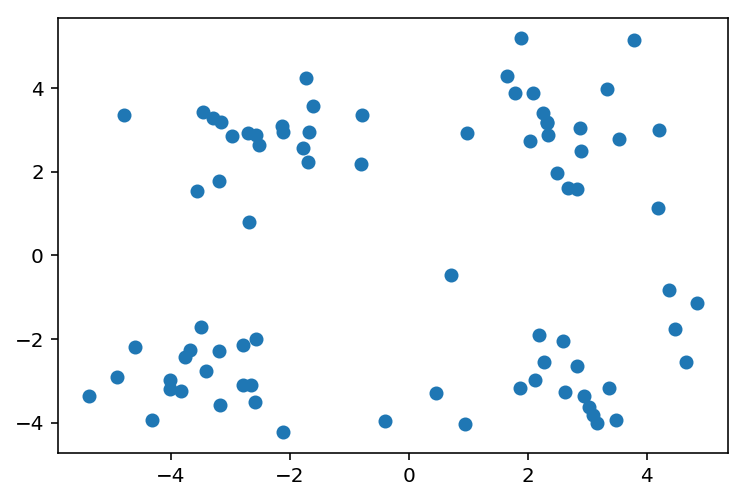

In [9]:
plt.scatter(data[:, 0], data[:, 1])
plt.show()

In [13]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(data)
print('聚类中心：', kmeans.cluster_centers_)
print('每个数据的类标：', kmeans.labels_)

初始化的聚类中心： [[-2.709034  2.923887]
 [ 3.367037 -3.184789]
 [-3.453687  3.424321]
 [ 4.372646 -0.822248]]
迭代到第 3 次，聚类中心没有发生变化，这时聚类是稳定的，聚类结束。
聚类中心： [[-3.53973889 -2.89384326]
 [ 2.65077367 -2.79019029]
 [-2.46154315  2.78737555]
 [ 2.6265299   3.10868015]]
每个数据的类标： [3 2 1 0 3 2 1 0 3 2 1 0 3 2 1 1 3 2 1 0 3 2 1 0 3 2 1 0 3 2 1 0 3 2 1 0 3
 2 1 0 3 2 1 0 3 2 1 0 3 2 1 0 3 2 1 0 3 2 1 0 3 2 1 0 3 2 1 0 3 2 1 0 3 2
 1 0 3 2 1 0]


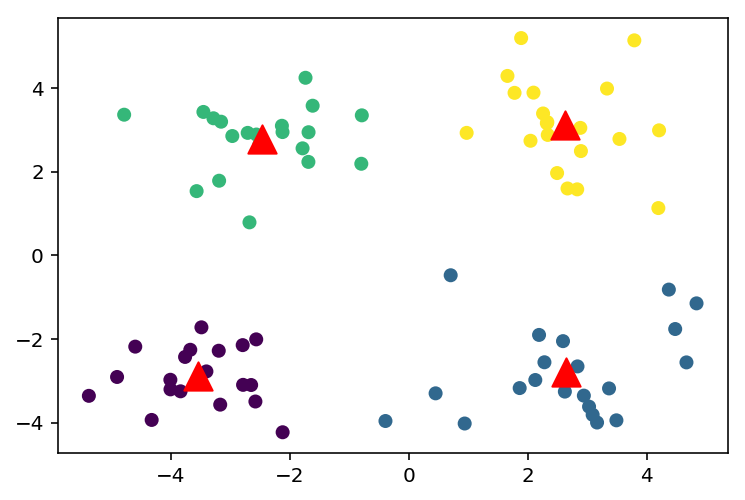

In [14]:
# 绘制数据
plt.scatter(data[:, 0], data[:, 1], c=kmeans.labels_)
# 绘制质心
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[
            :, 1], s=200, c='r', marker='^')
plt.show()